In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
#from scipy import random
from scipy.stats import norm
import warnings
from itertools import repeat
warnings.filterwarnings("ignore", category=DeprecationWarning)
plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn

# Cono de Winston 

In [342]:
df1 = pd.read_csv("winston_VF.csv", sep = ',')  # sep = ',' sirve para separar en 2 columnas el excel leido.

In [343]:
df1

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN
4997,4.997,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN
4998,4.998,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN
4999,4.999,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN


In [4]:
df1.min()

Tiempo (ns)    0.000000
Rayo 1         3.363254
Rayo 2         3.363240
Rayo 3         3.363255
Rayo 4         3.363243
                 ...   
Rayo 1996      3.294951
Rayo 1997      3.283212
Rayo 1998      0.029631
Rayo 1999      1.326228
Rayo 2000      0.370520
Length: 2001, dtype: float64

In [5]:
lista_columnas1=[]
for i in df1.iloc[:,1:]:
    if df1[i][5000]!=df1[i][4999]:
        lista_columnas1.append(i)

In [6]:
len(lista_columnas1)

374

In [7]:
for i in range(374):
    df1[lista_columnas1[i]]=np.NAN
    i=i+1

## dataframe solo con los rayos que llegan al detector

In [344]:
df1

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN
4997,4.997,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN
4998,4.998,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN
4999,4.999,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN


In [9]:
df1.iloc[[5000]]

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
5000,5.0,3.363254,3.36324,3.363255,3.363243,3.36322,3.363218,3.363215,3.36322,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN


In [10]:
lista_1=df1.iloc[[5000]].mean()

In [11]:
lista_1

Tiempo (ns)    5.000000
Rayo 1         3.363254
Rayo 2         3.363240
Rayo 3         3.363255
Rayo 4         3.363243
                 ...   
Rayo 1996      3.294951
Rayo 1997      3.283212
Rayo 1998      0.029631
Rayo 1999      1.326228
Rayo 2000           NaN
Length: 2001, dtype: float64

In [12]:
df_1 = pd.DataFrame()

In [13]:
df_1['List1']=lista_1

In [14]:
df_1= df_1.drop(df_1.index[[0]])

In [15]:
df_1

,List1
Rayo 1,3.363254
Rayo 2,3.363240
Rayo 3,3.363255
Rayo 4,3.363243
Rayo 5,3.363220
...,...
Rayo 1996,3.294951
Rayo 1997,3.283212
Rayo 1998,0.029631
Rayo 1999,1.326228


## Valor promedio de los 2000 rayos al llegar al detector

In [16]:
df_1['List1'].sum()

5355.0234422204

In [17]:
Winston=5355.023442220399/2000

In [18]:
Winston

2.6775117211101995

# Cono de Winston_mod

In [19]:
df2 = pd.read_csv("winston_mod_VF.csv", sep = ',')  # sep = ',' sirve para separar en 2 columnas el excel leido.

In [20]:
df2

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.315,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.246181,3.253160,3.249462,3.249466,NaN,3.250330,3.251932
316,0.316,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.245702,3.253160,3.249462,3.249466,NaN,3.250330,3.251932
317,0.317,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.245702,3.253160,3.249462,3.249466,NaN,3.250330,3.251932
318,0.318,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.245702,3.253160,3.249462,3.249466,NaN,3.250330,3.251932


In [21]:
Lista_null=df2.columns[df2.isna().any()].tolist()

In [22]:
len(Lista_null)

170

In [23]:
df2[Lista_null]=np.NAN

In [24]:
df2

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,5.000000
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,NaN,4.993460,4.993460
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,NaN,4.986928,4.986928
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,NaN,4.980405,4.980405
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,NaN,4.973890,4.973890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.315,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.246181,3.253160,3.249462,3.249466,NaN,3.250330,3.251932
316,0.316,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.245702,3.253160,3.249462,3.249466,NaN,3.250330,3.251932
317,0.317,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.245702,3.253160,3.249462,3.249466,NaN,3.250330,3.251932
318,0.318,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.245702,3.253160,3.249462,3.249466,NaN,3.250330,3.251932


In [25]:
df2.iloc[[319]]

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
319,0.319,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.245702,3.25316,3.249462,3.249466,NaN,3.25033,3.251932


In [26]:
lista_2=df2.iloc[[319]].mean()

In [27]:
lista_2

Tiempo (ns)    0.319000
Rayo 1         3.363261
Rayo 2         3.363236
Rayo 3         3.363242
Rayo 4         3.363248
                 ...   
Rayo 1996      3.249462
Rayo 1997      3.249466
Rayo 1998           NaN
Rayo 1999      3.250330
Rayo 2000      3.251932
Length: 2001, dtype: float64

In [28]:
df_2 = pd.DataFrame()

In [29]:
df_2['List2']=lista_2

In [30]:
df_2= df_2.drop(df_2.index[[0]])

In [31]:
df_2

,List2
Rayo 1,3.363261
Rayo 2,3.363236
Rayo 3,3.363242
Rayo 4,3.363248
Rayo 5,3.363246
...,...
Rayo 1996,3.249462
Rayo 1997,3.249466
Rayo 1998,NaN
Rayo 1999,3.250330


## Valor promedio de los 2000 rayos al llegar al detector

In [32]:
df_2['List2'].sum()

6022.270808689949

In [33]:
Winston_mod=6022.270808689949/2000

In [34]:
Winston_mod

3.0111354043449747

## Barra

In [35]:
df3 = pd.read_csv("barra_VF.csv", sep = ',')  # sep = ',' sirve para separar en 2 columnas el excel leido.

In [36]:
df3

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4997,4.997,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4998,4.998,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4999,4.999,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN


In [37]:
df3.min()

Tiempo (ns)    0.000000
Rayo 1         3.363247
Rayo 2         3.363224
Rayo 3         3.363242
Rayo 4         3.363241
                 ...   
Rayo 1996      2.203493
Rayo 1997      0.547344
Rayo 1998      0.162875
Rayo 1999      0.121032
Rayo 2000      2.215060
Length: 2001, dtype: float64

In [38]:
df3.describe()

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,...,306.000000,182.000000,1224.000000,5001.000000,5001.000000,612.000000,1641.000000,2532.000000,5001.000000,608.000000
mean,2.500000,3.409718,3.409697,3.409713,3.409712,3.409695,3.409685,3.409665,3.409676,3.409679,...,4.112973,4.451965,2.456844,1.090899,1.090651,3.418784,2.015784,1.417266,0.777957,3.422808
std,1.443809,0.216808,0.216812,0.216809,0.216809,0.216812,0.216815,0.216819,0.216817,0.216816,...,0.486521,0.306849,1.146312,0.963060,0.962904,0.807622,1.244629,1.291021,1.123541,0.809100
min,0.000000,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,3.332328,3.945306,0.963473,0.636731,0.636743,2.203493,0.547344,0.162875,0.121032,2.215060
25%,1.250000,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,3.682070,4.186037,1.454202,0.636731,0.636743,2.708867,0.948452,0.382757,0.121032,2.701766
50%,2.500000,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,4.095261,4.441457,2.194867,0.636731,0.636743,3.319282,1.654304,0.905390,0.169620,3.338877
75%,3.750000,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,4.525075,4.712461,3.312760,0.923946,0.923946,4.093921,2.885461,2.113769,0.923946,4.099283
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [39]:
lista_columnas3=[]
for i in df3.iloc[:,1:]:
    if df3[i][5000]!=df3[i][4999]:
        lista_columnas3.append(i)

In [40]:
len(lista_columnas3)

1417

In [41]:
for i in range(1417):
    df3[lista_columnas3[i]]=np.NAN
    i=i+1

## dataframe solo con los rayos que llegan al detector

In [42]:
df3

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,NaN,NaN,NaN,5.000000,5.000000,NaN,NaN,NaN,5.000000,NaN
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,NaN,NaN,NaN,4.993460,4.993460,NaN,NaN,NaN,4.993460,NaN
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,NaN,NaN,NaN,4.986928,4.986928,NaN,NaN,NaN,4.986928,NaN
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,NaN,NaN,NaN,4.980405,4.980405,NaN,NaN,NaN,4.980405,NaN
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,NaN,NaN,NaN,4.973890,4.973890,NaN,NaN,NaN,4.973890,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4997,4.997,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4998,4.998,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4999,4.999,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN


In [43]:
df3.iloc[[5000]]

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
5000,5.0,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN


In [44]:
lista_3=df3.iloc[[5000]].mean()

In [45]:
lista_3

Tiempo (ns)    5.000000
Rayo 1         3.363247
Rayo 2         3.363224
Rayo 3         3.363242
Rayo 4         3.363241
                 ...   
Rayo 1996           NaN
Rayo 1997           NaN
Rayo 1998           NaN
Rayo 1999      0.121032
Rayo 2000           NaN
Length: 2001, dtype: float64

In [46]:
df_3 = pd.DataFrame()

In [47]:
df_3['List3']=lista_3

In [48]:
df_3= df_3.drop(df_3.index[[0]])

In [49]:
df_3

,List3
Rayo 1,3.363247
Rayo 2,3.363224
Rayo 3,3.363242
Rayo 4,3.363241
Rayo 5,3.363222
...,...
Rayo 1996,NaN
Rayo 1997,NaN
Rayo 1998,NaN
Rayo 1999,0.121032


In [50]:
df_3['List3'].sum()

596.2359162557299

In [51]:
Barra=596.23591625573/2000

In [52]:
Barra

0.298117958127865

# Comparacion energía promedio en el detector de las 3 geometrias 

In [53]:
list=(Winston,Winston_mod,Barra)

In [54]:
lista_name=['Winston','Winston_mod','Barra']

In [55]:
df = pd.DataFrame()

In [56]:
df['Geometría']=lista_name

In [57]:
df['Energía Promedio']=list

In [58]:
df

,Geometría,Energía Promedio
0,Winston,2.677512
1,Winston_mod,3.011135
2,Barra,0.298118


Text(1.85, 0.35, '0.298118 [w]')

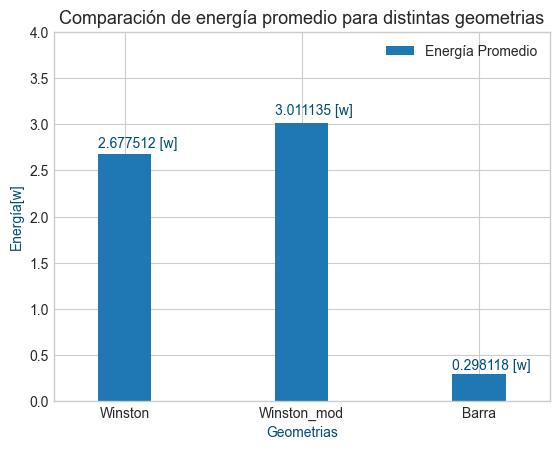

In [59]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
df.plot(x='Geometría', y='Energía Promedio', kind="bar",width=0.3)
plt.tick_params(axis="x", rotation=0, labelsize=10)
plt.rcParams["figure.figsize"] = (6, 4)
plt.xlabel('Geometrias', fontsize=10, horizontalalignment='center', position=(0.5,-0.5), c=txt_color2) # Titulo eje x
plt.ylabel('Energía[w]', fontsize=10, c=txt_color2) 
plt.ylim(0,4)
plt.title('Comparación de energía promedio para distintas geometrias', fontsize=13)  # Titulo de la grafica
plt.legend(prop={'size': 10})
plt.text(-0.15,2.75, '2.677512 [w]', fontsize = 10, c=txt_color2)
plt.text(0.85,3.1, '3.011135 [w]', fontsize = 10, c=txt_color2)
plt.text(1.85,0.35, '0.298118 [w]', fontsize = 10, c=txt_color2)

## bsdmadmsald

In [60]:
df_=pd.DataFrame()

In [61]:
df_['Winston_Cone']=df_1
df_['Winston_Cone_mod']=df_2
df_['Barra_Simple']=df_3

## Dataframe Con valores NaN

In [62]:
df_

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
Rayo 5,3.363220,3.363246,3.363222
...,...,...,...
Rayo 1996,3.294951,3.249462,NaN
Rayo 1997,3.283212,3.249466,NaN
Rayo 1998,0.029631,NaN,NaN
Rayo 1999,1.326228,3.250330,0.121032


In [63]:
data = pd.DataFrame()

In [64]:
data['Winston_Cone']=lista_1
data['Winston_Cone_mod']=lista_2
data['Barra_Simple']=lista_3

In [65]:
data

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Tiempo (ns),5.000000,0.319000,5.000000
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
...,...,...,...
Rayo 1996,3.294951,3.249462,NaN
Rayo 1997,3.283212,3.249466,NaN
Rayo 1998,0.029631,NaN,NaN
Rayo 1999,1.326228,3.250330,0.121032


In [66]:
data=data.drop(data.index[[0]])

In [130]:
data

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
Rayo 5,3.363220,3.363246,3.363222
...,...,...,...
Rayo 1996,3.294951,3.249462,NaN
Rayo 1997,3.283212,3.249466,NaN
Rayo 1998,0.029631,NaN,NaN
Rayo 1999,1.326228,3.250330,0.121032


In [67]:
data['Winston_Cone'].isnull().sum(),data['Winston_Cone_mod'].isnull().sum(),data['Barra_Simple'].isnull().sum()

(374, 170, 1417)

In [68]:
data = data.fillna(0)

## Dataframe Con valores NaN = 0

In [69]:
data

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
Rayo 5,3.363220,3.363246,3.363222
...,...,...,...
Rayo 1996,3.294951,3.249462,0.000000
Rayo 1997,3.283212,3.249466,0.000000
Rayo 1998,0.029631,0.000000,0.000000
Rayo 1999,1.326228,3.250330,0.121032


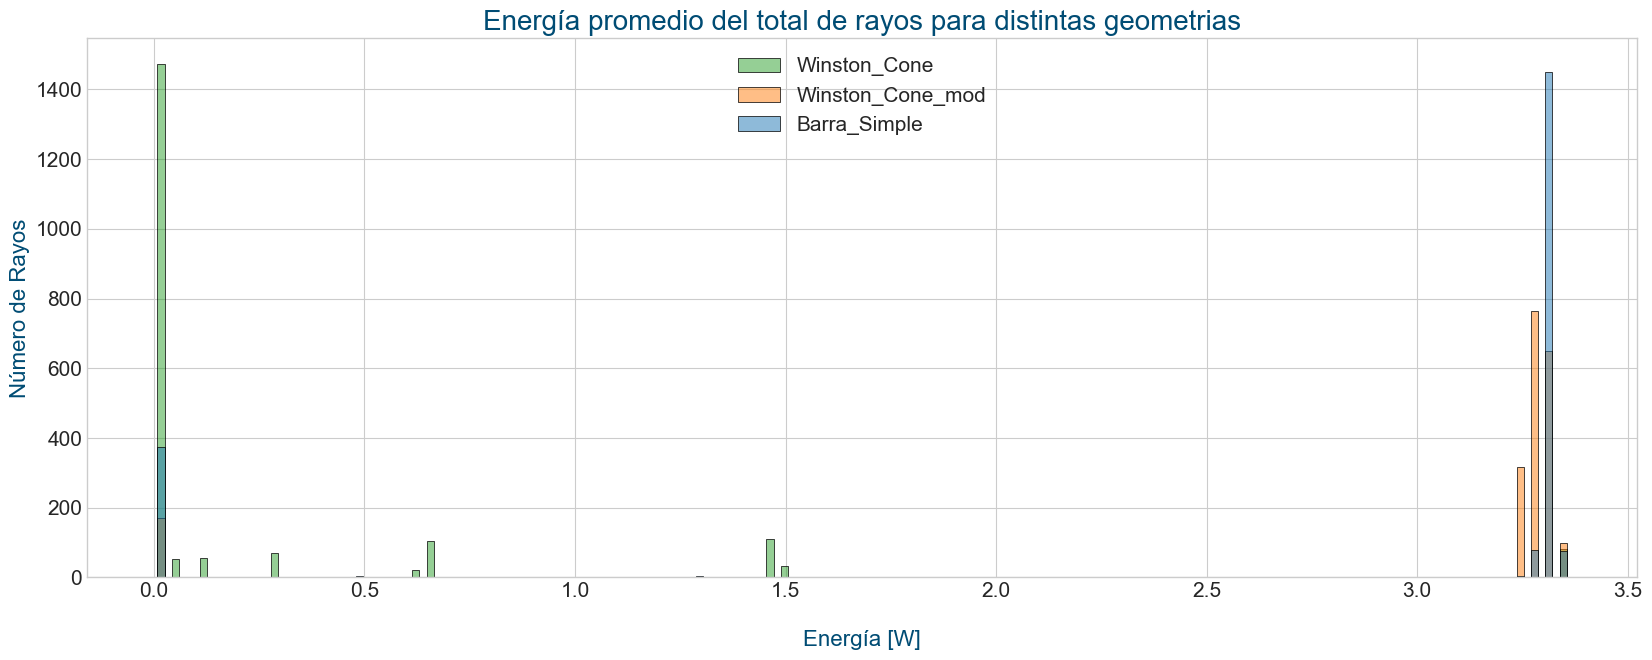

In [125]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.figure(figsize = (20,7))
sns.histplot(data,bins=100,shrink=0.5, color=('r','a','p'))
plt.xlabel('\nEnergía [W]', c=txt_color2, fontsize=16)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=16)
plt.title('Energía promedio del total de rayos para distintas geometrias',c=txt_color2, fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(data,prop={'size': 15})

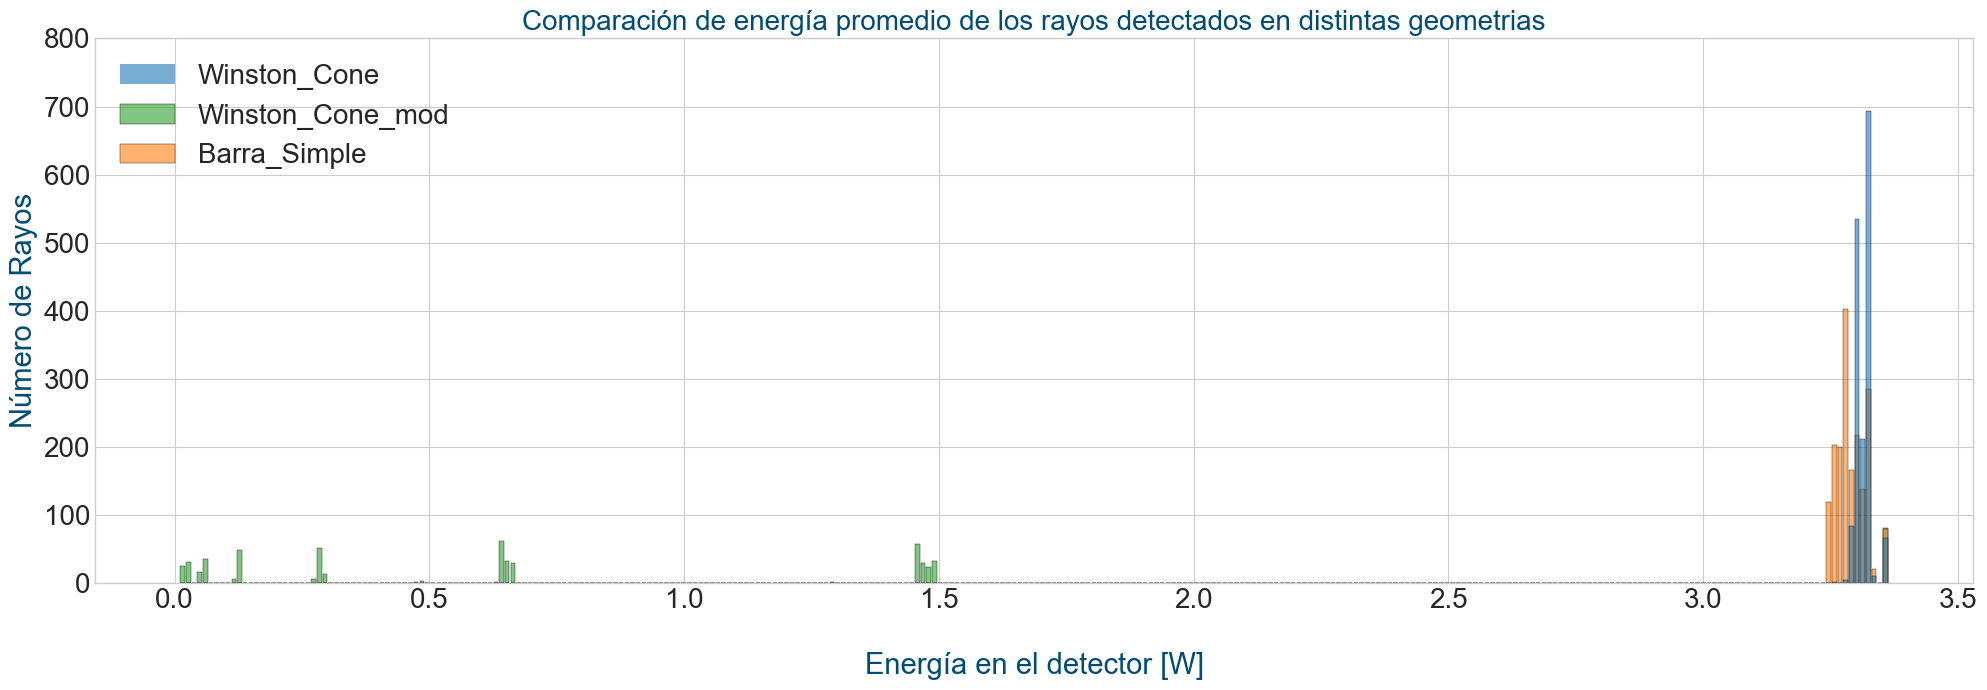

In [124]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.figure(figsize = (20,7))
sns.histplot(df_,bins=300,shrink=0.8,alpha=0.6)
plt.ylim(0,800)
plt.xlabel('\nEnergía en el detector [W]', c=txt_color2, fontsize=21)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=21)
plt.title('Comparación de energía promedio de los rayos detectados en distintas geometrias',fontsize=20,loc='center', c=txt_color2)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
plt.legend(df_,prop={'size': 20})

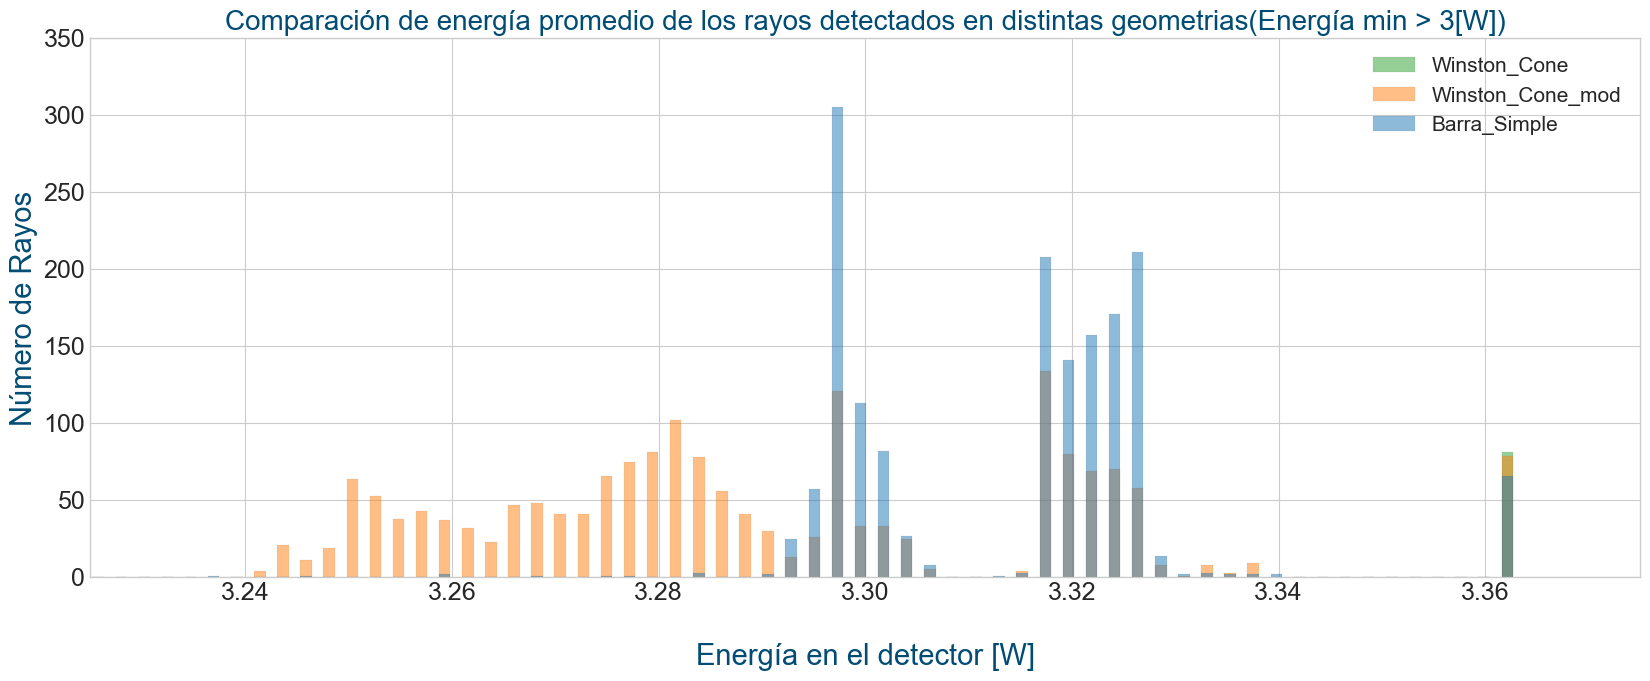

In [130]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.figure(figsize = (20,7))
sns.histplot(df_,bins=1500,shrink=0.5, color=('r','a','p'))
plt.xlim(3.48,3.62)
plt.ylim(0,350)
plt.xlabel('\nEnergía en el detector [W]', c=txt_color2, fontsize=21)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=21)
plt.title('Comparación de energía promedio de los rayos detectados en distintas geometrias(Energía min > 3[W])',fontsize=20,loc='center', c=txt_color2)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(df_,prop={'size': 15})


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

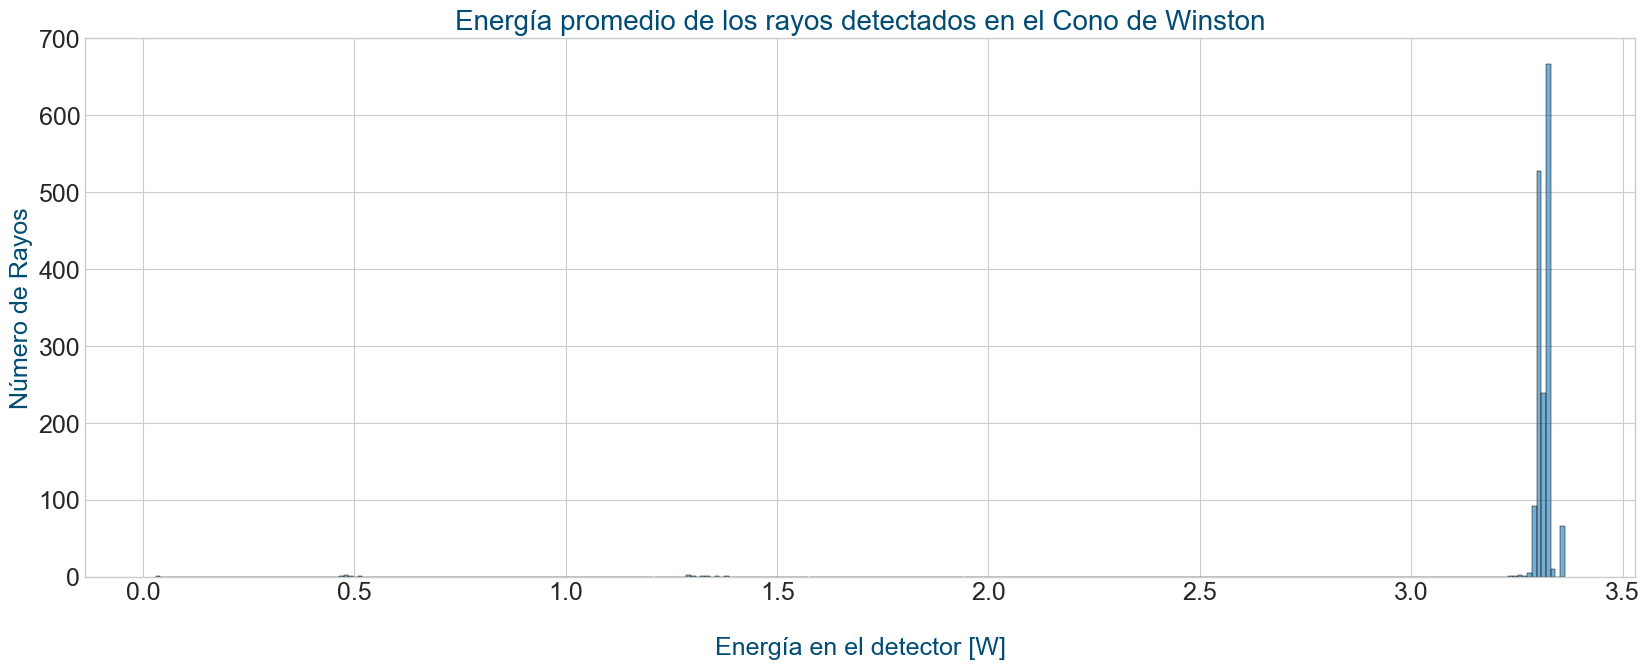

In [141]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.figure(figsize = (20,7))
sns.histplot(data=df_1, x='List1',bins=300,alpha=0.6)
#plt.ylim(0,600)
#plt.xlim(3.2,3.37)
plt.xlabel('\nEnergía en el detector [W]', c=txt_color2, fontsize=18)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=18)
plt.title('Energía promedio de los rayos detectados en el Cono de Winston',fontsize=20,loc='center', c=txt_color2)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350')])

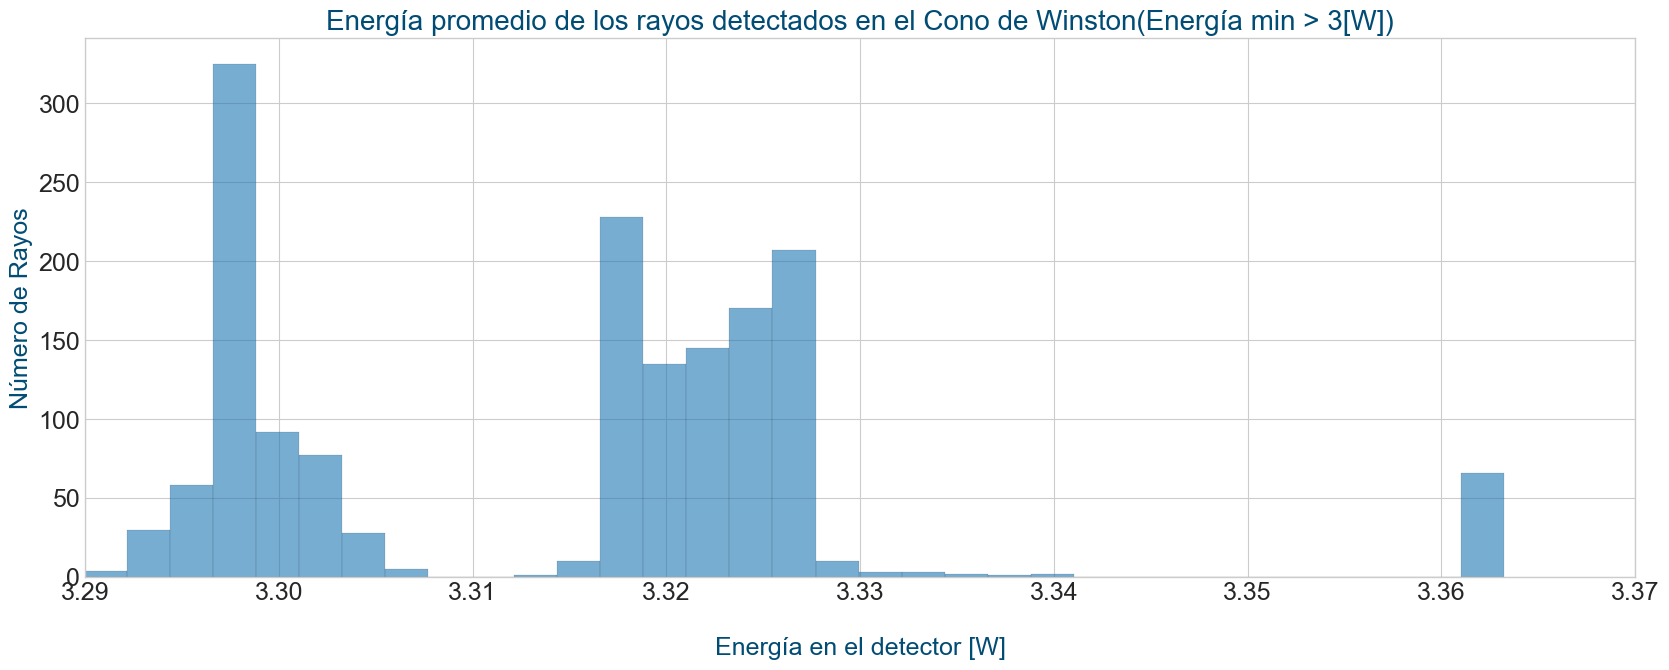

In [147]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.figure(figsize = (20,7))
sns.histplot(data=df_1, x='List1',bins=1500,alpha=0.6)
#plt.ylim(0,600)
plt.xlim(3.29,3.37)
plt.xlabel('\nEnergía en el detector [W]', c=txt_color2, fontsize=18)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=18)
plt.title('Energía promedio de los rayos detectados en el Cono de Winston(Energía min > 3[W])',fontsize=20,loc='center', c=txt_color2)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70')])

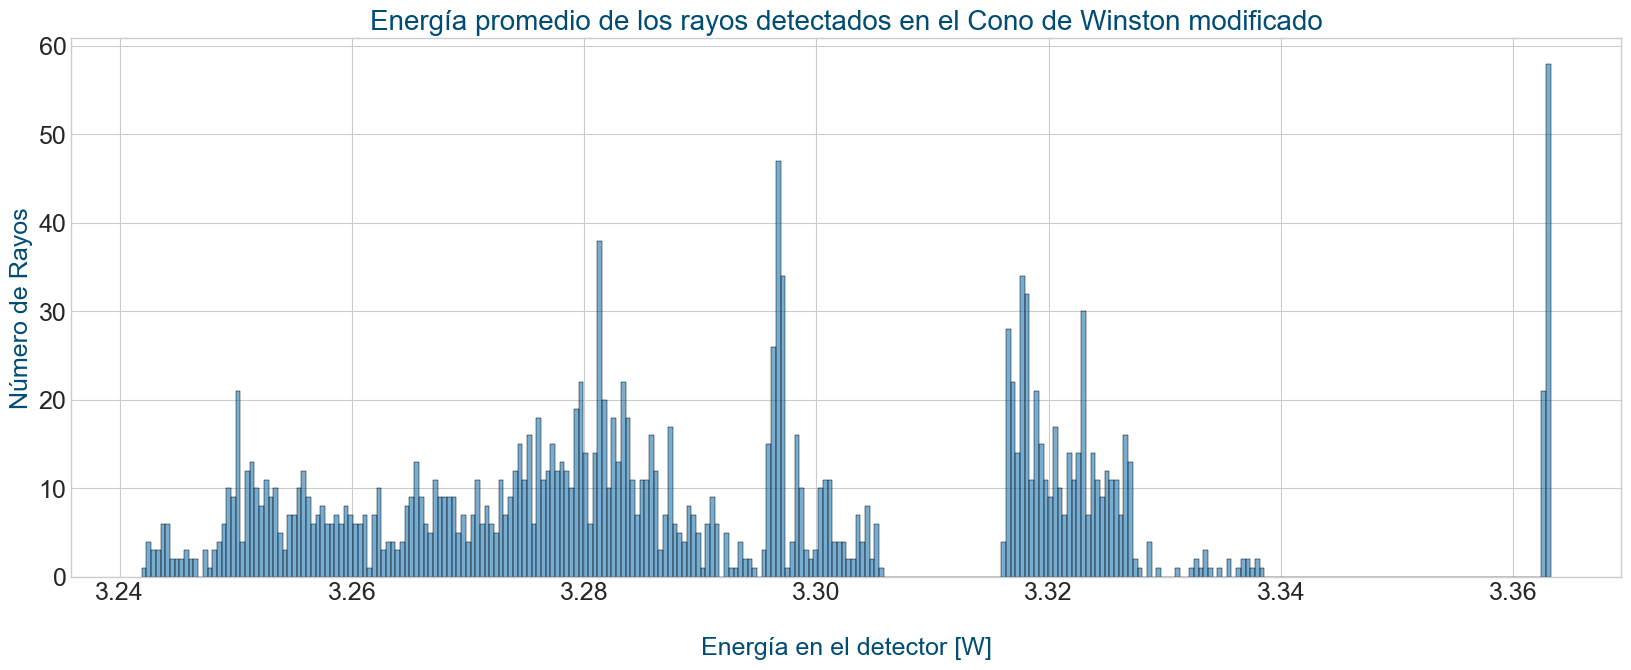

In [142]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.figure(figsize = (20,7))
sns.histplot(data=df_2, x='List2',bins=300,alpha=0.6)
#plt.ylim(0,600)
#plt.xlim(3.2,3.37)
plt.xlabel('\nEnergía en el detector [W]', c=txt_color2, fontsize=18)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=18)
plt.title('Energía promedio de los rayos detectados en el Cono de Winston modificado',fontsize=20,loc='center', c=txt_color2)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90')])

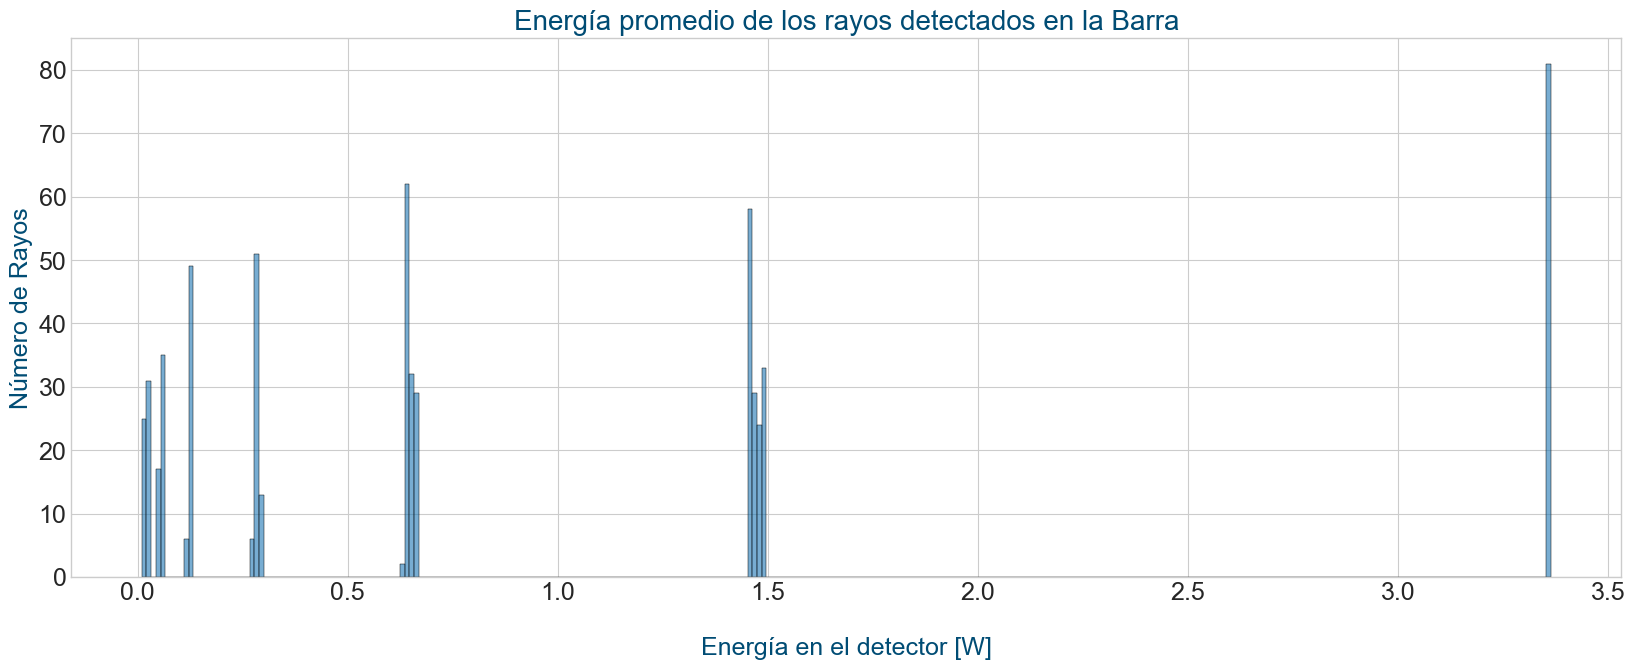

In [148]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.figure(figsize = (20,7))
sns.histplot(data=df_3, x='List3',bins=300,alpha=0.6)
#plt.ylim(0,600)
#plt.xlim(3.2,3.37)
plt.xlabel('\nEnergía en el detector [W]', c=txt_color2, fontsize=18)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=18)
plt.title('Energía promedio de los rayos detectados en la Barra',fontsize=20,loc='center', c=txt_color2)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)


## Trabajando con los tiempos de llegada al detector

In [152]:
df1_t=pd.DataFrame()

In [153]:
df1_t=df1

In [154]:
df1_t

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,NaN
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,NaN
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,NaN
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN
4997,4.997,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN
4998,4.998,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN
4999,4.999,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228,NaN


In [156]:
df1_t=df1_t.dropna(axis=1)

In [163]:
p1 = df1_t.nunique()
print(p1)

Tiempo (ns)    5001
Rayo 1          304
Rayo 2          304
Rayo 3          304
Rayo 4          304
               ... 
Rayo 1995       311
Rayo 1996       310
Rayo 1997       313
Rayo 1998      3690
Rayo 1999       970
Length: 1627, dtype: int64


In [164]:
df1_t

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1990,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.303487,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228
4997,4.997,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.303487,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228
4998,4.998,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.303487,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228
4999,4.999,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.303487,3.299426,3.295369,3.293177,3.292458,3.292937,3.294951,3.283212,0.029631,1.326228


In [158]:
df2_t=pd.DataFrame()

In [159]:
df2_t=df2

In [160]:
df2_t

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,5.000000
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,NaN,4.993460,4.993460
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,NaN,4.986928,4.986928
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,NaN,4.980405,4.980405
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,NaN,4.973890,4.973890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.315,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.246181,3.253160,3.249462,3.249466,NaN,3.250330,3.251932
316,0.316,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.245702,3.253160,3.249462,3.249466,NaN,3.250330,3.251932
317,0.317,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.245702,3.253160,3.249462,3.249466,NaN,3.250330,3.251932
318,0.318,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302053,3.300825,3.273217,3.245702,3.253160,3.249462,3.249466,NaN,3.250330,3.251932


In [165]:
df2_t=df2_t.dropna(axis=1)

In [166]:
p2 = df2_t.nunique()
print(p2)

Tiempo (ns)    320
Rayo 1         304
Rayo 2         304
Rayo 3         304
Rayo 4         304
              ... 
Rayo 1995      315
Rayo 1996      316
Rayo 1997      316
Rayo 1999      316
Rayo 2000      315
Length: 1831, dtype: int64


In [179]:
df2_t

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1990,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1999,Rayo 2000
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.315,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302901,3.302053,3.300825,3.273217,3.246181,3.253160,3.249462,3.249466,3.250330,3.251932
316,0.316,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302901,3.302053,3.300825,3.273217,3.245702,3.253160,3.249462,3.249466,3.250330,3.251932
317,0.317,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302901,3.302053,3.300825,3.273217,3.245702,3.253160,3.249462,3.249466,3.250330,3.251932
318,0.318,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.302901,3.302053,3.300825,3.273217,3.245702,3.253160,3.249462,3.249466,3.250330,3.251932


In [167]:
df3_t=pd.DataFrame()

In [168]:
df3_t=df3

In [169]:
df3_t

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,NaN,NaN,NaN,5.000000,5.000000,NaN,NaN,NaN,5.000000,NaN
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,NaN,NaN,NaN,4.993460,4.993460,NaN,NaN,NaN,4.993460,NaN
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,NaN,NaN,NaN,4.986928,4.986928,NaN,NaN,NaN,4.986928,NaN
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,NaN,NaN,NaN,4.980405,4.980405,NaN,NaN,NaN,4.980405,NaN
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,NaN,NaN,NaN,4.973890,4.973890,NaN,NaN,NaN,4.973890,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4997,4.997,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4998,4.998,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4999,4.999,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN


In [170]:
df3_t=df3_t.dropna(axis=1)

In [171]:
p3 = df3_t.nunique()
print(p3)

Tiempo (ns)    5001
Rayo 1          304
Rayo 2          304
Rayo 3          304
Rayo 4          304
               ... 
Rayo 1984      3366
Rayo 1989      2143
Rayo 1994      1531
Rayo 1995      1531
Rayo 1999      2754
Length: 584, dtype: int64


In [180]:
df3_t

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1965,Rayo 1970,Rayo 1972,Rayo 1976,Rayo 1983,Rayo 1984,Rayo 1989,Rayo 1994,Rayo 1995,Rayo 1999
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,0.052573,0.632494,0.052566,0.276614,0.636645,0.053260,0.280292,0.636731,0.636743,0.121032
4997,4.997,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,0.052573,0.632494,0.052566,0.276614,0.636645,0.053260,0.280292,0.636731,0.636743,0.121032
4998,4.998,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,0.052573,0.632494,0.052566,0.276614,0.636645,0.053260,0.280292,0.636731,0.636743,0.121032
4999,4.999,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,0.052573,0.632494,0.052566,0.276614,0.636645,0.053260,0.280292,0.636731,0.636743,0.121032


In [181]:
lista_ind_1=[]
for i in range(1627):
    val_indice1=p1[i]-1
    lista_ind_1.append(df1['Tiempo (ns)'][val_indice1])
    i=i+1

In [183]:
lista_ind_1 = (lista_ind_1 + 2001 * [0])[:2001]

In [184]:
lista_ind_2=[]
for i in range(1831):
    val_indice2=p2[i]-1
    lista_ind_2.append(df2['Tiempo (ns)'][val_indice2])
    i=i+1

In [185]:
lista_ind_2 = (lista_ind_2 + 2001 * [0])[:2001]

In [186]:
lista_ind_3=[]
for i in range(584):
    val_indice=p3[i]-1
    lista_ind_3.append(df3['Tiempo (ns)'][val_indice])
    i=i+1

In [187]:
lista_ind_3 = (lista_ind_3+ 2001 * [0])[:2001]

In [188]:
df_t = pd.DataFrame()

In [189]:
df_t['Tiempo de llegada Winston Cone']=lista_ind_1
df_t['Tiempo de llegada Winston Cone_mod']=lista_ind_2
df_t['Tiempo de llegada Barra']=lista_ind_3

In [190]:
df_t= df_t.drop(df_t.index[[0]])

In [191]:
df_t

,Tiempo de llegada Winston Cone,Tiempo de llegada Winston Cone_mod,Tiempo de llegada Barra
1,0.303,0.303,0.303
2,0.303,0.303,0.303
3,0.303,0.303,0.303
4,0.303,0.303,0.303
5,0.303,0.303,0.303
...,...,...,...
1996,0.000,0.000,0.000
1997,0.000,0.000,0.000
1998,0.000,0.000,0.000
1999,0.000,0.000,0.000


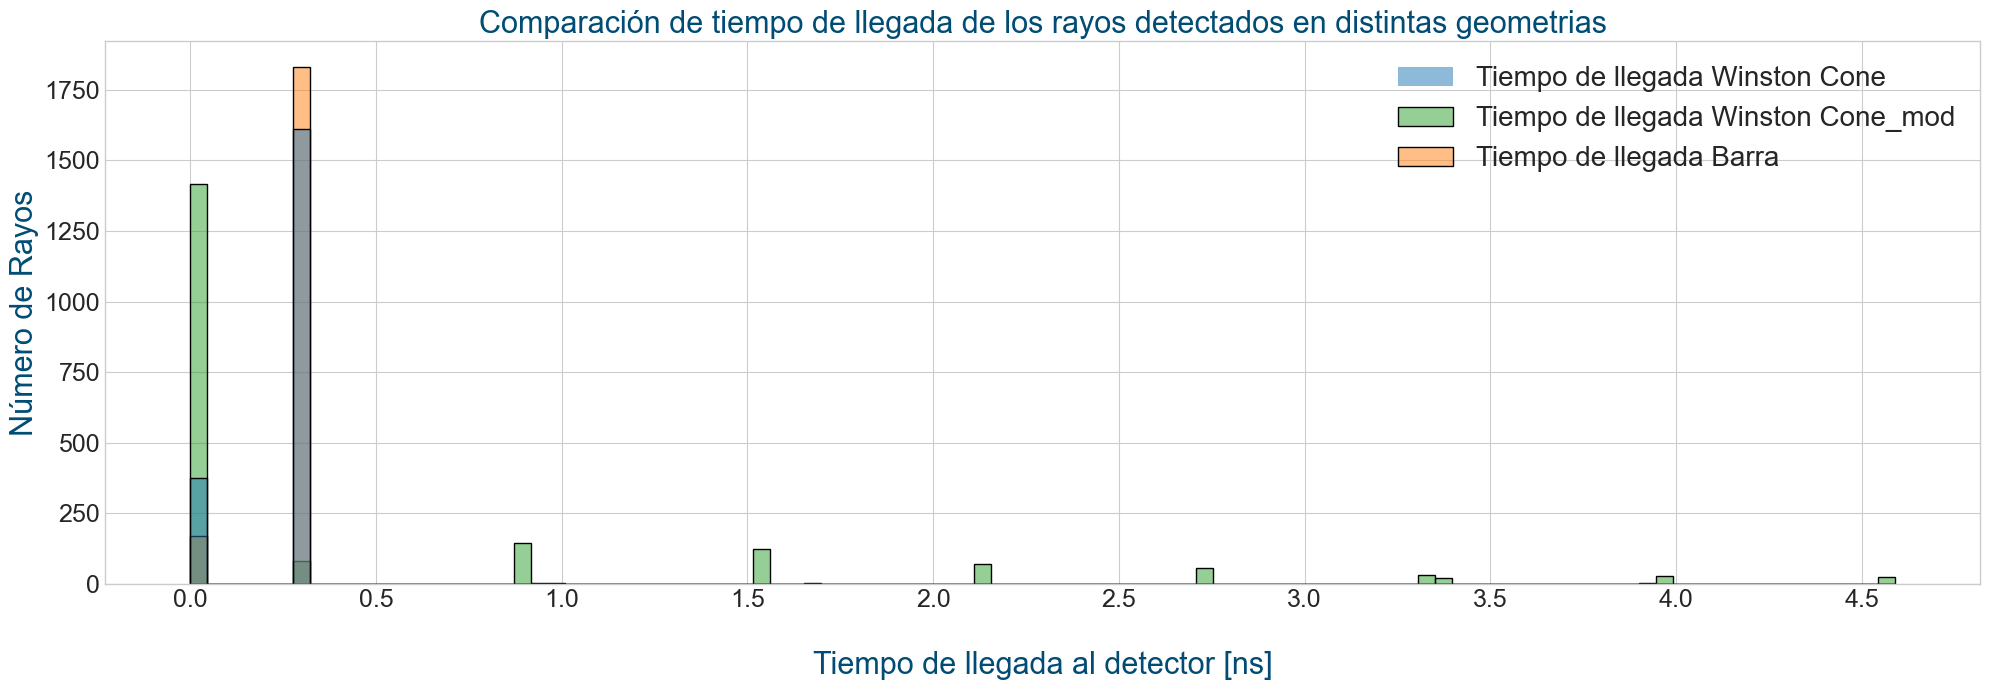

In [271]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.figure(figsize = (20,7))
sns.histplot(df_t,bins=100,shrink=1,alpha=0.5)
plt.xlabel('\nTiempo de llegada al detector [ns]', c=txt_color2, fontsize=22)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=22)
plt.title('Comparación de tiempo de llegada de los rayos detectados en distintas geometrias',fontsize=22,loc='center', c=txt_color2)
plt.xticks(np.arange(0,5,0.5))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(df_t,prop={'size': 20})
plt.tight_layout()


In [378]:
df_t

,Tiempo de llegada Winston Cone,Tiempo de llegada Winston Cone_mod,Tiempo de llegada Barra
1,0.303,0.303,0.303
2,0.303,0.303,0.303
3,0.303,0.303,0.303
4,0.303,0.303,0.303
5,0.303,0.303,0.303
...,...,...,...
1996,0.000,0.000,0.000
1997,0.000,0.000,0.000
1998,0.000,0.000,0.000
1999,0.000,0.000,0.000


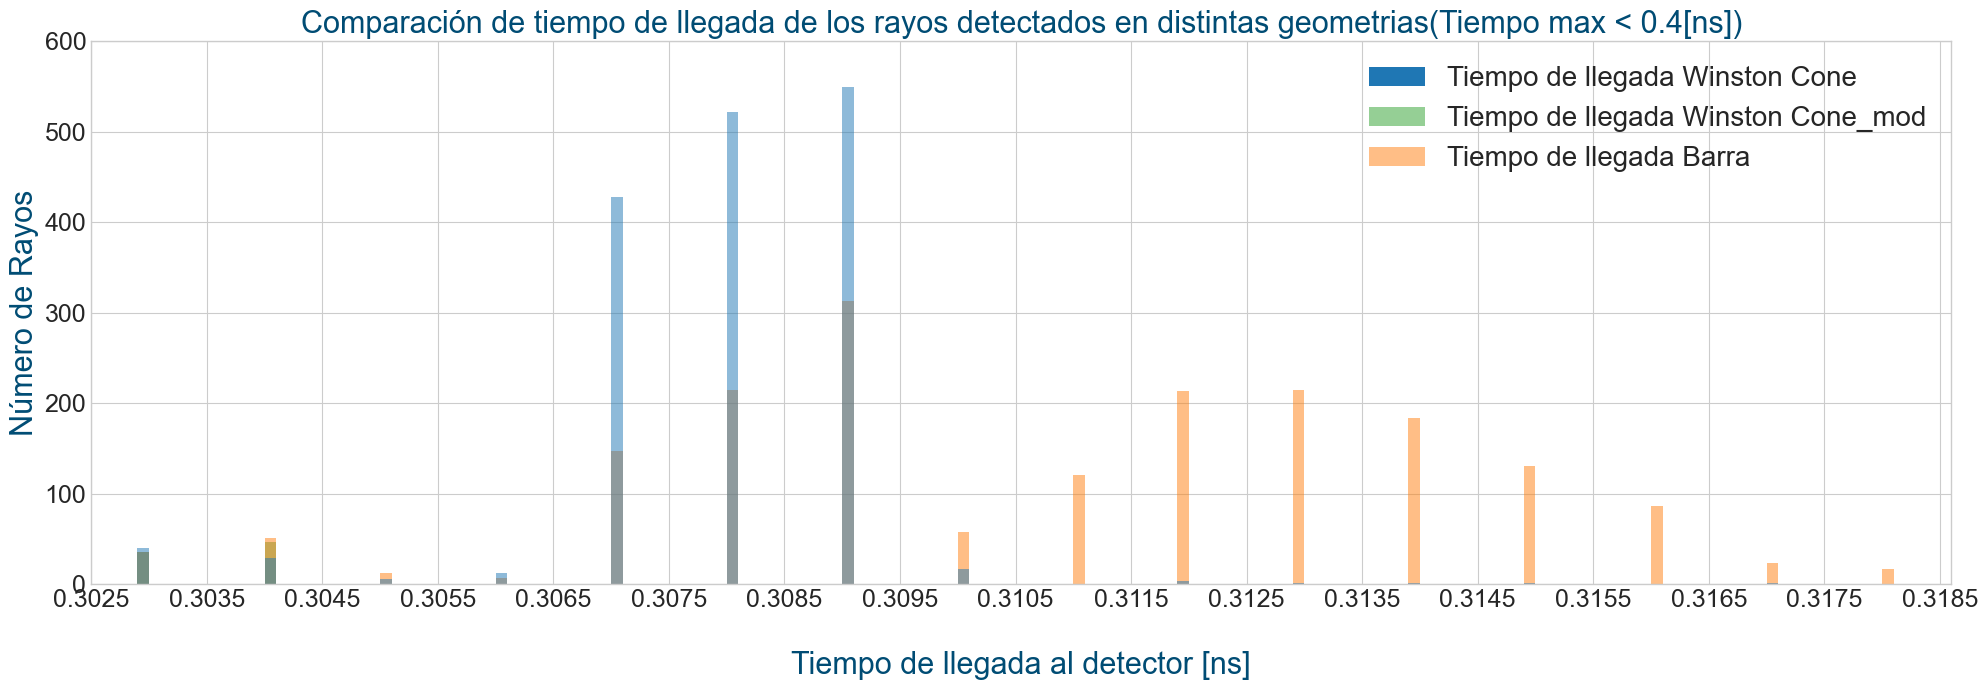

In [264]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.figure(figsize = (20,7))
sns.histplot(df_t,bins=1000,shrink=0.995,binwidth=0.0001)
plt.xlim(0.3025,0.3186)
plt.ylim(0,600)
plt.xticks(np.arange(0.3025,0.3186,0.001))
plt.xlabel('\nTiempo de llegada al detector [ns]', c=txt_color2, fontsize=22)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=22)
plt.title('Comparación de tiempo de llegada de los rayos detectados en distintas geometrias(Tiempo max < 0.4[ns])',fontsize=22,loc='center', c=txt_color2)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(df_t,prop={'size': 20})
plt.tight_layout()

## Tiempo de llegada vs número de fotones

In [360]:
df_f1 = pd.DataFrame()
df_f2 = pd.DataFrame()
df_f3 = pd.DataFrame()

In [361]:
df_f1=df1.copy()
df_f2=df2.copy()
df_f3=df3.copy()

In [365]:
df_f1

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,0.001,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,...,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953
2,0.002,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,...,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617
3,0.003,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,...,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990
4,0.004,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,...,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,672.650810,672.648028,672.651089,672.648648,672.644077,672.643694,672.643034,672.643987,672.642801,...,659.885298,659.073829,658.635343,658.491634,658.587436,658.990131,656.642432,5.926285,265.245539,NaN
4997,4.997,672.650810,672.648028,672.651089,672.648648,672.644077,672.643694,672.643034,672.643987,672.642801,...,659.885298,659.073829,658.635343,658.491634,658.587436,658.990131,656.642432,5.926285,265.245539,NaN
4998,4.998,672.650810,672.648028,672.651089,672.648648,672.644077,672.643694,672.643034,672.643987,672.642801,...,659.885298,659.073829,658.635343,658.491634,658.587436,658.990131,656.642432,5.926285,265.245539,NaN
4999,4.999,672.650810,672.648028,672.651089,672.648648,672.644077,672.643694,672.643034,672.643987,672.642801,...,659.885298,659.073829,658.635343,658.491634,658.587436,658.990131,656.642432,5.926285,265.245539,NaN


In [311]:
rayos=[]

for k in range(1,2001):
    rayos.append('Rayo'+ ' ' + repr(k))

In [362]:
for k in range(5001):
    for i in df_f1.iloc[:,1:]:
        df_f1[i][k]=(df_f1[i][k]*1000)/5

In [374]:
df_f2

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,NaN,1000.000000,1000.000000
1,0.001,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,...,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,998.691953,NaN,998.691953,998.691953
2,0.002,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,...,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,997.385617,NaN,997.385617,997.385617
3,0.003,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,...,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,996.080990,NaN,996.080990,996.080990
4,0.004,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,...,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,994.778070,NaN,994.778070,994.778070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.315,672.652135,672.647176,672.648394,672.649666,672.649234,672.647694,672.636204,672.637539,672.638816,...,660.410540,660.165063,654.643395,649.236193,650.632078,649.892442,649.893238,NaN,650.065979,650.386439
316,0.316,672.652135,672.647176,672.648394,672.649666,672.649234,672.647694,672.636204,672.637539,672.638816,...,660.410540,660.165063,654.643395,649.140300,650.632078,649.892442,649.893238,NaN,650.065979,650.386439
317,0.317,672.652135,672.647176,672.648394,672.649666,672.649234,672.647694,672.636204,672.637539,672.638816,...,660.410540,660.165063,654.643395,649.140300,650.632078,649.892442,649.893238,NaN,650.065979,650.386439
318,0.318,672.652135,672.647176,672.648394,672.649666,672.649234,672.647694,672.636204,672.637539,672.638816,...,660.410540,660.165063,654.643395,649.140300,650.632078,649.892442,649.893238,NaN,650.065979,650.386439


In [373]:
for k in range(320):
    for i in df_f2.iloc[:,1:]:
        df_f2[i][k]=(df_f2[i][k]*1000)/5

In [375]:
df_f3

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,NaN,NaN,NaN,5.000000,5.000000,NaN,NaN,NaN,5.000000,NaN
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,NaN,NaN,NaN,4.993460,4.993460,NaN,NaN,NaN,4.993460,NaN
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,NaN,NaN,NaN,4.986928,4.986928,NaN,NaN,NaN,4.986928,NaN
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,NaN,NaN,NaN,4.980405,4.980405,NaN,NaN,NaN,4.980405,NaN
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,NaN,NaN,NaN,4.973890,4.973890,NaN,NaN,NaN,4.973890,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4997,4.997,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4998,4.998,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4999,4.999,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN


In [376]:
for k in range(5001):
    for i in df_f3.iloc[:,1:]:
        df_f3[i][k]=(df_f3[i][k]*1000)/5

## Energía como fotones

### Fotones Promedio por geometría

#### Energía inicial de cada rayo (5w)  corresponde al 100% de fotones, suponiendo 1000 fotones por rayo (2.000.000 de fotones totales) 

In [272]:
data

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
Rayo 5,3.363220,3.363246,3.363222
...,...,...,...
Rayo 1996,3.294951,3.249462,0.000000
Rayo 1997,3.283212,3.249466,0.000000
Rayo 1998,0.029631,0.000000,0.000000
Rayo 1999,1.326228,3.250330,0.121032


In [273]:
lista_valor1=[]
for i in range(2000):
    valor1=(data['Winston_Cone'][i]*1000)/5
    lista_valor1.append(valor1)
    i=i+i

In [274]:
lista_valor2=[]
for i in range(2000):
    valor2=(data['Winston_Cone_mod'][i]*1000)/5
    lista_valor2.append(valor2)
    i=i+i

In [275]:
lista_valor3=[]
for i in range(2000):
    valor3=(data['Barra_Simple'][i]*1000)/5
    lista_valor3.append(valor3)
    i=i+i

In [276]:
df_fotones = pd.DataFrame()

In [277]:
rayos=[]

for k in range(1,2001):
    rayos.append('Rayo' + repr(k))

In [278]:
df_fotones['Rayos']=rayos
df_fotones['Número_de_fotones_finales_Winston_Cone']=lista_valor1
df_fotones['Número_de_fotones_finales_Winston_Cone_mod']=lista_valor2
df_fotones['Número_de_fotones_finales_Barra_Simple']=lista_valor3

In [279]:
df_fotones

,Rayos,Número_de_fotones_finales_Winston_Cone,Número_de_fotones_finales_Winston_Cone_mod,Número_de_fotones_finales_Barra_Simple
0,Rayo1,672.650810,672.652135,672.649349
1,Rayo2,672.648028,672.647176,672.644831
2,Rayo3,672.651089,672.648394,672.648365
3,Rayo4,672.648648,672.649666,672.648143
4,Rayo5,672.644077,672.649234,672.644471
...,...,...,...,...
1995,Rayo1996,658.990131,649.892442,0.000000
1996,Rayo1997,656.642432,649.893238,0.000000
1997,Rayo1998,5.926285,0.000000,0.000000
1998,Rayo1999,265.245539,650.065979,24.206425


In [280]:
fotones1=df_fotones['Número_de_fotones_finales_Winston_Cone'].mean()

In [282]:
fotones2=df_fotones['Número_de_fotones_finales_Winston_Cone_mod'].mean()

In [283]:
fotones3=df_fotones['Número_de_fotones_finales_Barra_Simple'].mean()

In [284]:
df_f_mean = pd.DataFrame()

In [285]:
list_m=(fotones1,fotones2,fotones3)

In [286]:
lista_name_m=['Fotones_Winston','Fotones_Winston_mod','Fotones_Barra']

In [287]:
df_f_mean['Geometría']=lista_name_m
df_f_mean['Fotones Finales']=list_m

In [288]:
df_f_mean

,Geometría,Fotones Finales
0,Fotones_Winston,535.502344
1,Fotones_Winston_mod,602.227081
2,Fotones_Barra,59.623592


Text(1.85, 68, '59.623592 Fotones')

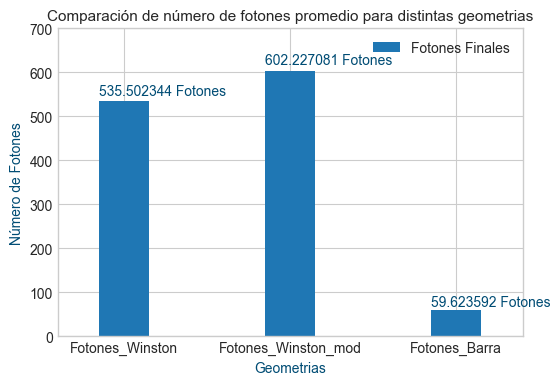

In [291]:
df_f_mean.plot(x='Geometría', y='Fotones Finales', kind="bar",width=0.3)
plt.tick_params(axis="x", rotation=0, labelsize=10)
plt.rcParams["figure.figsize"] = (6, 4)
plt.xlabel('Geometrias', fontsize=10, horizontalalignment='center', position=(0.5,-0.5), c=txt_color2) # Titulo eje x
plt.ylabel('Número de Fotones', fontsize=10, c=txt_color2) # Titulo eje x
plt.ylim(0,700)
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.title('Comparación de número de fotones promedio para distintas geometrias', fontsize=11)  # Titulo de la grafica
plt.legend(prop={'size': 7})
plt.text(-0.15,548, '535.502344 Fotones', fontsize = 10, c=txt_color2)
plt.text(0.85,620, '602.227081 Fotones', fontsize = 10, c=txt_color2)
plt.text(1.85,68, '59.623592 Fotones', fontsize = 10, c=txt_color2)

## Fotones por rayo para cada geometria

In [382]:
df_t

,Tiempo de llegada Winston Cone,Tiempo de llegada Winston Cone_mod,Tiempo de llegada Barra
1,0.303,0.303,0.303
2,0.303,0.303,0.303
3,0.303,0.303,0.303
4,0.303,0.303,0.303
5,0.303,0.303,0.303
...,...,...,...
1996,0.000,0.000,0.000
1997,0.000,0.000,0.000
1998,0.000,0.000,0.000
1999,0.000,0.000,0.000


In [292]:
df_fotones

,Rayos,Número_de_fotones_finales_Winston_Cone,Número_de_fotones_finales_Winston_Cone_mod,Número_de_fotones_finales_Barra_Simple
0,Rayo1,672.650810,672.652135,672.649349
1,Rayo2,672.648028,672.647176,672.644831
2,Rayo3,672.651089,672.648394,672.648365
3,Rayo4,672.648648,672.649666,672.648143
4,Rayo5,672.644077,672.649234,672.644471
...,...,...,...,...
1995,Rayo1996,658.990131,649.892442,0.000000
1996,Rayo1997,656.642432,649.893238,0.000000
1997,Rayo1998,5.926285,0.000000,0.000000
1998,Rayo1999,265.245539,650.065979,24.206425


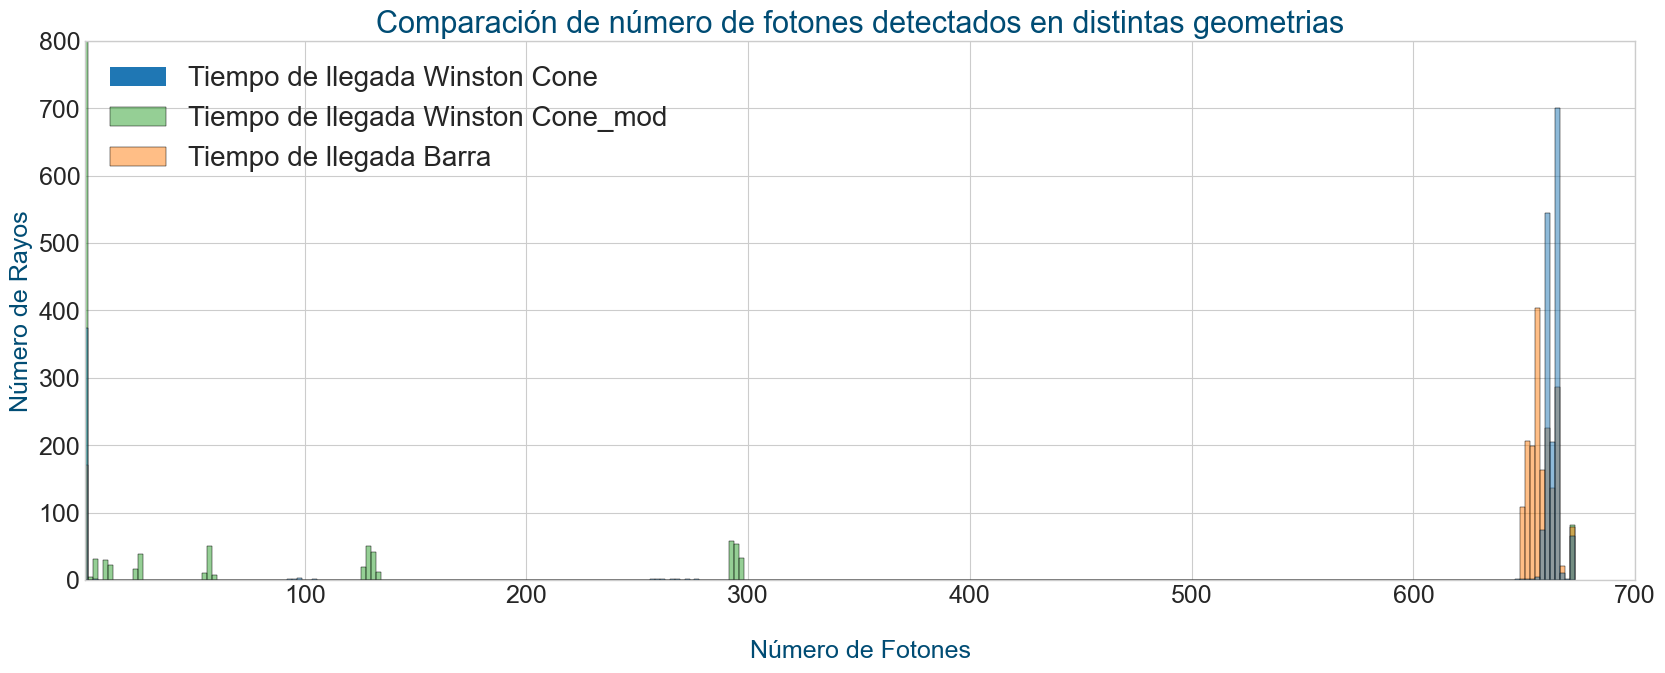

In [303]:
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.figure(figsize = (20,7))
sns.histplot(df_fotones,bins=300)
plt.xlim(1,700)
plt.ylim(0,800)
plt.xlabel('\nNúmero de Fotones', c=txt_color2, fontsize=18)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=18)
plt.title('Comparación de número de fotones detectados en distintas geometrias',fontsize=22,loc='center', c=txt_color2)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(df_t,prop={'size': 20})

## Desviacion Estandar

In [383]:
df_

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
Rayo 5,3.363220,3.363246,3.363222
...,...,...,...
Rayo 1996,3.294951,3.249462,NaN
Rayo 1997,3.283212,3.249466,NaN
Rayo 1998,0.029631,NaN,NaN
Rayo 1999,1.326228,3.250330,0.121032


In [384]:
data

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
Rayo 5,3.363220,3.363246,3.363222
...,...,...,...
Rayo 1996,3.294951,3.249462,0.000000
Rayo 1997,3.283212,3.249466,0.000000
Rayo 1998,0.029631,0.000000,0.000000
Rayo 1999,1.326228,3.250330,0.121032
